In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage import morphology

#anaconda torch is the environment


# from skimage.transform import rotate
# from skimage.feature import local_binary_pattern
# from skimage import data
from skimage.color import label2rgb

Packages for this project

pip install numpy
pip install matplotlib
pip install opencv-python
pip install scikit-image
pip install pyfftw

#to install phasepack 
#go to the directory phasepack-1.5
#and type: 
#python setup.py install

In [2]:
from phasepack import phasesym

c:\Users\Novalis\anaconda3\lib\site-packages\phasepack\tools.py:11: UserWarning: 
Module 'pyfftw' (FFTW Python bindings) could not be imported. To install it, try
running 'pip install pyfftw' from the terminal. Falling back on the slower
'fftpack' module for 2D Fourier transforms.
  warnings.warn("""


In [4]:
from skimage.color import label2rgb

def seis_cube(file,nx,ni,ns):
    size_data=[nx*1,ni*1,ns*1]
    seis=np.fromfile(file,dtype=np.float32)
    seis=np.reshape(seis,size_data)
    return seis


def imgs_show(im1,im2,title1='image 1',title2='image 2'):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(im1,cmap='gray')
    ax1.set_title(title1)
    ax2.imshow(im2,cmap='gray')
    ax2.set_title(title2)

def im_rescale(img,mi=0,ma=1):
    imi=img.min()
    ima=img.max()
    d=ima-imi
    imgr=mi+(img-imi)*ma/d
    return imgr
    
def img_show(im,cmp='gray'):
    plt.imshow(im,cmap=cmp)

def seis_show(im):
    plt.imshow(im,cmap=plt.cm.seismic)


def rem_small_objs1(image,disk=1):
    footprint=morphology.disk(disk)
    res= morphology.white_tophat(image, footprint)
    return image-res

def rem_small_objs2(image,min_size=64,con=1):
    imager=im_rescale(image)*255 
    imager=imager.astype(int)
    res= morphology.remove_small_objects(imager,min_size,connectivity=con)
    return imager-res    


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)

#float image  to grayscale
def im2gray(im):
    imr=im_rescale(im,0,255)
    imr=imr.astype(np.uint8)
    return imr




In [90]:
from scipy.ndimage import filters
def sobel_mag(image):
    """
    Apply the Sobel edge detection algorithm to the input image.

    Parameters:
        image (numpy array): The input image, assumed to be grayscale.

    
    """

    # Define the Sobel kernels
    Kx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

    # Apply the Sobel kernels to the image
    Gx = filters.convolve(image, Kx )
    Gy = filters.convolve(image, Ky)

    # Compute the gradient magnitude and direction
    G = np.sqrt(Gx**2 + Gy**2)
    return G

In [5]:
def sobel_edge_detection(image):
    """
    Apply the Sobel edge detection algorithm to the input image.

    Parameters:
        image (numpy array): The input image, assumed to be grayscale.

    Returns:
        edges (numpy array): The output edge map, where each pixel is 0 or 1.
    """

    # Define the Sobel kernels
    Kx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

    # Apply the Sobel kernels to the image
    Gx = filters.convolve(image, Kx )
    Gy = filters.convolve(image, Ky)

    # Compute the gradient magnitude and direction
    G = np.sqrt(Gx**2 + Gy**2)
    theta = np.arctan2(Gy, Gx)

    # Apply non-maximum suppression to thin the edges
    edges = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            if theta[i, j] < 0:
                theta[i, j] += np.pi
            elif theta[i, j] > np.pi:
                theta[i, j] -= np.pi
            dx = int(np.round(theta[i, j]/np.pi*2))
            dy = 1 - dx
            if G[i-dx, j-dy] >= G[i, j]:
                edges[i, j] = 0
            else:
                edges[i, j] = 255

    return edges.astype(np.uint8)

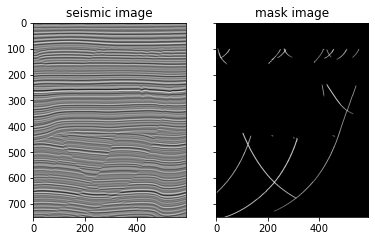

In [52]:
#loading some seismic image  extratted from seismic cube


seis_im50=np.load('seis_im50.npy')
mask_im50=np.load('mask_im50.npy')
#displaying in gray scale
imgs_show(seis_im50,mask_im50,'seismic image','mask image') 
plt.show()


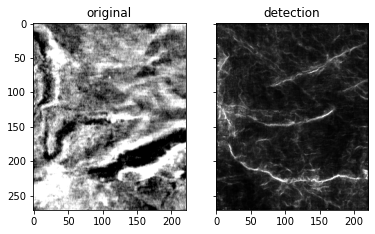

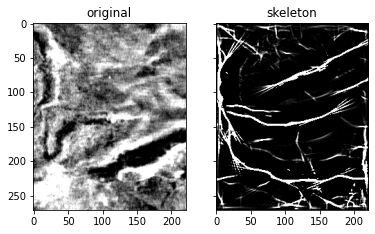

In [55]:
#some addtional seismic images

imgeo273=np.load('imgeo273.npy')
imgeo273_dtc=np.load('imgeo273_dtc.npy')
#displaying both images
imgs_show(imgeo273,imgeo273_dtc, 'original','detection')
#skeleton  atribute from the imageo273
imgeo273_sk=np.load('imgeo273_sk.npy')
#displaying both images
imgs_show(imgeo273,imgeo273_sk, 'original','skeleton')

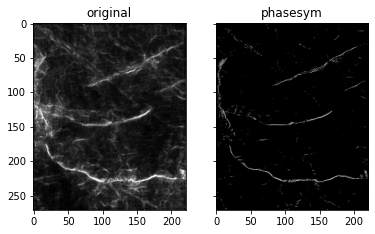

In [78]:
    
im_phasesym, orientation, totalEnergy, T=phasesym(imgeo273_dtc, nscale=5, norient=6,minWaveLength=3, \
         mult=2.1,sigmaOnf=0.55, k=2., polarity=0, noiseMethod=-1)
    
imgs_show(imgeo273_dtc,im_phasesym,'original','phasesym')


In [57]:
def autothresh(image):
#Automatic threshold method
# @param image: image to segment
#@return : threshold value
# """
    s = 0.5*( np.amin(image) + np.amax(image))
    done = False
    while ~done:
        B = image>=s;
        sNext = .5*( np.mean(image[B]) + np.mean(image[~B]))
        done = abs(s-sNext)<.5
        s = sNext
    return s

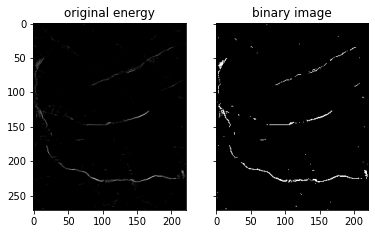

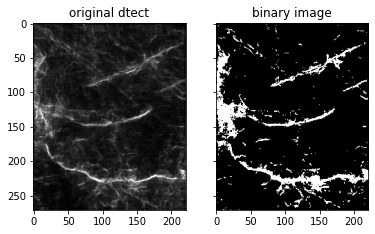

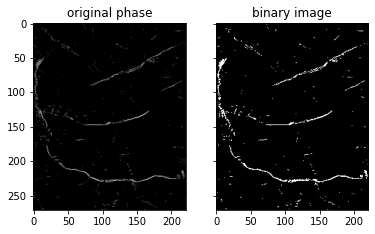

In [79]:
totalEnergyn=im2gray(totalEnergy)
imgeo273_dtcn=im2gray(imgeo273_dtc)
im_phasesymn=im2gray(im_phasesym)

s=autothresh(totalEnergyn)
bs=totalEnergyn>s
s2=autothresh(imgeo273_dtcn)
bs2=imgeo273_dtcn>s2
s3=autothresh(im_phasesymn)
bs3=im_phasesymn>s3


imgs_show(totalEnergyn,totalEnergyn>s,'original energy','binary image')
plt.show()
imgs_show(imgeo273_dtcn,imgeo273_dtcn>s2,'original dtect','binary image') 
plt.show()
imgs_show(im_phasesymn,im_phasesymn>s3,'original phase','binary image')
plt.show()

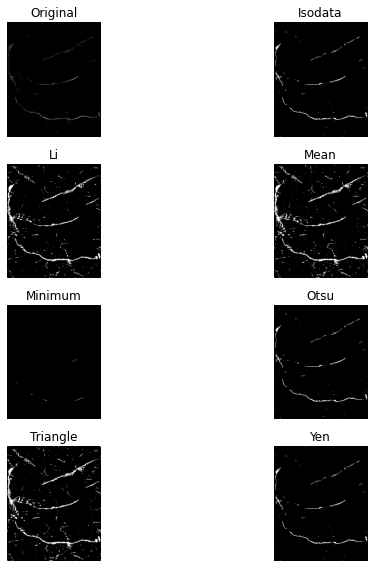

In [15]:
from skimage import data
from skimage.filters import try_all_threshold
img=totalEnergyn
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

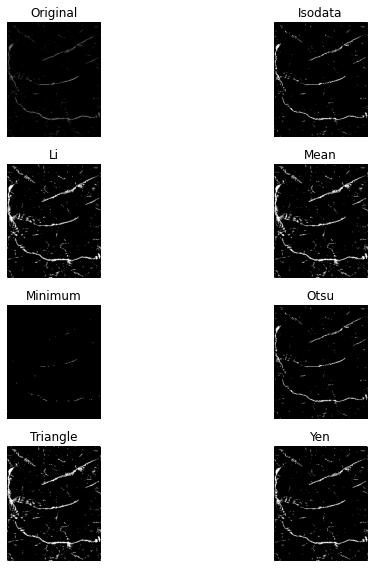

In [59]:
img=im_phasesymn
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

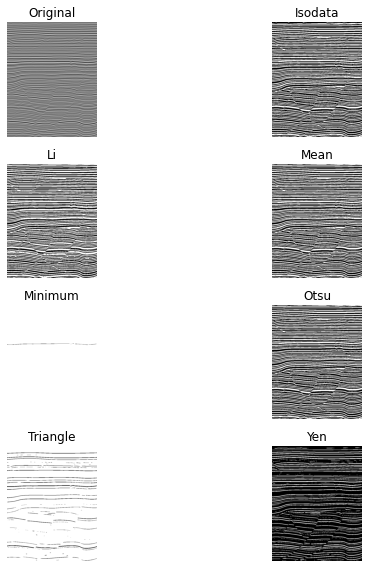

In [84]:
img=seis_im50n
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [60]:
from skimage.filters import threshold_otsu, threshold_local

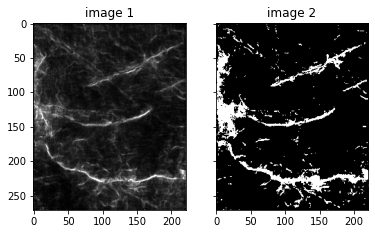

In [61]:
s_otsu = threshold_otsu( imgeo273_dtcn)
img_s_otsu = imgeo273_dtcn > s_otsu
imgs_show(imgeo273_dtcn,imgeo273_dtcn>s_otsu)
plt.show()

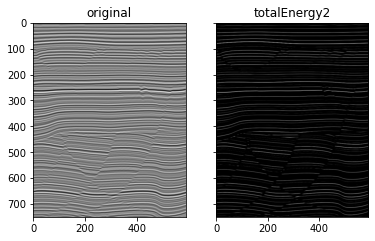

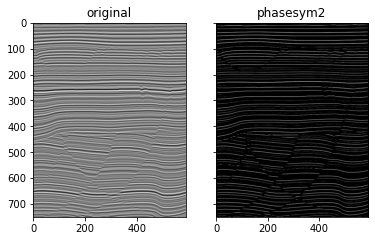

In [103]:
im_phasesym2, orientation2, totalEnergy2, T=phasesym(seis_im50n, nscale=5, norient=6,minWaveLength=2, \
         mult=2.1,sigmaOnf=0.55, k=4., polarity=1, noiseMethod=-1)
    
imgs_show(seis_im50,totalEnergy2,'original','totalEnergy2')
plt.show()
imgs_show(seis_im50,im_phasesym2,'original','phasesym2')
plt.show()


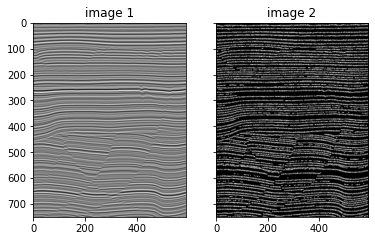

In [104]:
edges = sobel_edge_detection(im2gray(totalEnergy2))
imgs_show(seis_im50,edges)
plt.show()

In [21]:
from skimage.morphology import medial_axis, skeletonize, thin

In [94]:
#seis_im50n=im_rescale(seis_im50,0,1)
img2sobel=sobel_mag(seis_im50)


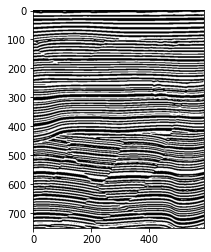

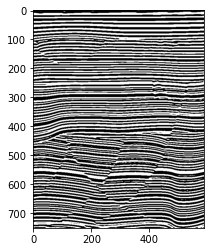

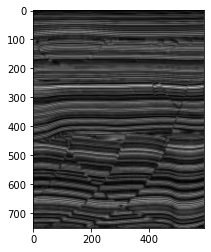

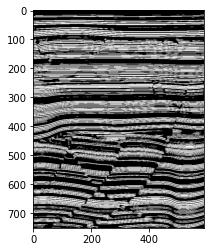

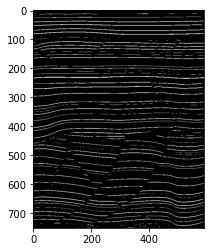

In [106]:
#img=seis_im50n
img2=im2gray(seis_im50)
s2=autothresh(img2)
s2_otsu= threshold_otsu( img2)
s2_otsu_sobel = threshold_otsu(img2sobel)
s2_otsu_energy2 = threshold_otsu(totalEnergy2)
imb2=img2>s2
imb2_otsu=img2>s2_otsu
imb2_otsu_sobel=img2sobel>s2_otsu_sobel
imb2_otsu_energy2=totalEnergy2>s2_otsu_energy2
plt.imshow(imb2,cmap='gray')
plt.show()
plt.imshow(imb2_otsu,cmap='gray')
plt.show()
plt.imshow(img2sobel,cmap='gray')
plt.show()
plt.imshow(imb2_otsu_sobel,cmap='gray')
plt.show()
plt.imshow(imb2_otsu_energy2,cmap='gray')
plt.show()





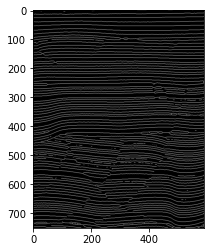

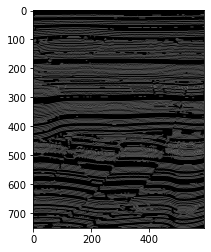

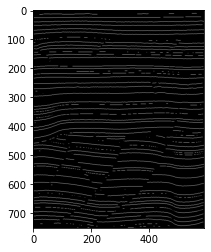

In [107]:
# Compute the medial axis transform
medial_axis_image = medial_axis(imb2_otsu)
medial_axis_image_sobel = medial_axis(imb2_otsu_sobel)
medial_axis_image_energy2 = medial_axis(imb2_otsu_energy2)
# Display the medial axis
plt.imshow(medial_axis_image, cmap='gray')
plt.show()
plt.imshow(medial_axis_image_sobel, cmap='gray')
plt.show()
plt.imshow(medial_axis_image_energy2, cmap='gray')
plt.show()


totalEnergyn=im2gray(totalEnergy)
imgeo273_dtcn=im2gray(imgeo273_dtc)
im_phasesymn=im2gray(im_phasesym)

s=autothresh(totalEnergyn)
bs=totalEnergyn>s
s2=autothresh(imgeo273_dtcn)
bs2=imgeo273_dtcn>s2
s3=autothresh(im_phasesymn)
bs3=im_phasesymn>s3

(-0.5, 220.5, 270.5, -0.5)

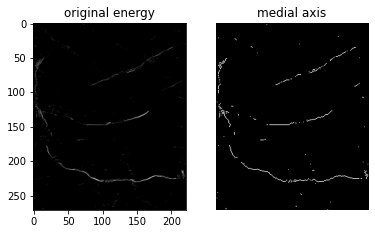

In [81]:
# Compute the medial axis transform
medial_axis_image = medial_axis(bs)
# Display the medial axis
imgs_show(totalEnergyn,medial_axis_image,'original energy','medial axis')
plt.axis('off')

(-0.5, 220.5, 270.5, -0.5)

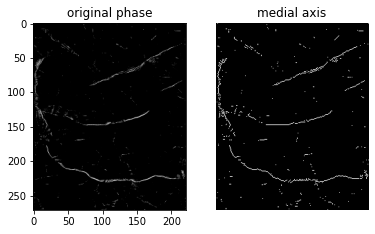

In [83]:
# Compute the medial axis transform
medial_axis_image3 = medial_axis(bs3)
# Display the medial axis
imgs_show(im_phasesymn,medial_axis_image3,'original phase','medial axis')
plt.axis('off')